Задание 1: Работа с массивами NumPy

In [41]:
import numpy as np

arr = np.random.randint(10, 100, size=50)

# Среднее арифметическое
mean = arr.mean()
print(f"Среднее арифметическое: {mean:.2f}")

# Медиана
median = np.median(arr)
print(f"Медиана: {median:.2f}")

# Стандартное отклонение
std_dev = arr.std()
print(f"Стандартное отклонение: {std_dev:.2f}")

# Новый массив, где каждое число делится на 3
new_arr = arr / 3
print("\nНовый массив:")
print(new_arr)

# Отфильтрованный массив
filtered_arr = new_arr[new_arr % 1 == 0]
print("\nОтфильтрованный массив:")
print(filtered_arr)

Среднее арифметическое: 57.82
Медиана: 57.50
Стандартное отклонение: 25.76

Новый массив:
[15.66666667  9.         16.          7.33333333 22.         11.33333333
  9.33333333 19.          3.66666667 19.33333333 27.         12.
 17.         18.         32.66666667 29.33333333 21.33333333  7.
  5.66666667 11.66666667 30.66666667 21.66666667 30.66666667 33.
 29.         17.33333333 21.33333333 26.66666667 26.         17.
  9.33333333 31.33333333 24.33333333 26.33333333 13.33333333 23.
 18.33333333  5.33333333  6.33333333 29.33333333 25.33333333 27.
 16.         25.         27.         31.66666667 28.          8.66666667
 11.33333333  9.        ]

Отфильтрованный массив:
[ 9. 16. 22. 19. 27. 12. 17. 18.  7. 33. 29. 26. 17. 23. 27. 16. 25. 27.
 28.  9.]


Задание 2: Анализ данных с помощью Pandas

In [52]:
import pandas as pd
data = pd.read_csv('sales_data_large.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     500 non-null    object
 1   region   500 non-null    object
 2   product  500 non-null    object
 3   sales    500 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [51]:
data.head(5)

,date,region,product,sales
0,2024-12-01,West,Widget C,246
1,2024-12-01,South,Widget B,152
2,2024-12-01,West,Widget B,391
3,2024-12-01,West,Widget A,272
4,2024-12-01,East,Widget A,337


In [56]:
region = data['region'].unique()
product = data['product'].unique()
print(f'Регионы {region}')
print(f'Продукты {product}')
region_sales = data.groupby(['region'])['sales'].sum()
print("Продажи по регионам:\n", region_sales)
avg_product_sales = data.groupby(['product'])['sales'].mean()
print("Средние продажи по продуктам:\n", avg_product_sales)
pivot_table = data.pivot_table(index='region', columns='product', values='sales', aggfunc='mean')
print("Средние продажи по регионам и продуктам:\n", pivot_table)

Регионы ['West' 'South' 'East' 'North']
Продукты ['Widget C' 'Widget B' 'Widget A']
Продажи по регионам:
 region
East     29244
North    39605
South    33023
West     35171
Name: sales, dtype: int64
Средние продажи по продуктам:
 product
Widget A    275.424242
Widget B    268.331361
Widget C    278.614458
Name: sales, dtype: float64
Средние продажи по регионам и продуктам:
 product    Widget A    Widget B    Widget C
region                                     
East     291.464286  263.116279  271.361111
North    289.145833  238.477273  304.660000
South    277.380952  282.833333  263.722222
West     250.106383  291.550000  267.136364


Задание 3: Очистка данных и визуализация

Пропущенные значения перед очисткой:
date      10
sales     10
region     0
dtype: int64

Пропущенные значения после очистки:
date      0
sales     0
region    0
dtype: int64


C:\Users\ПК\AppData\Local\Temp\ipykernel_10204\1349062219.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sales'].fillna(mean_sales, inplace=True)


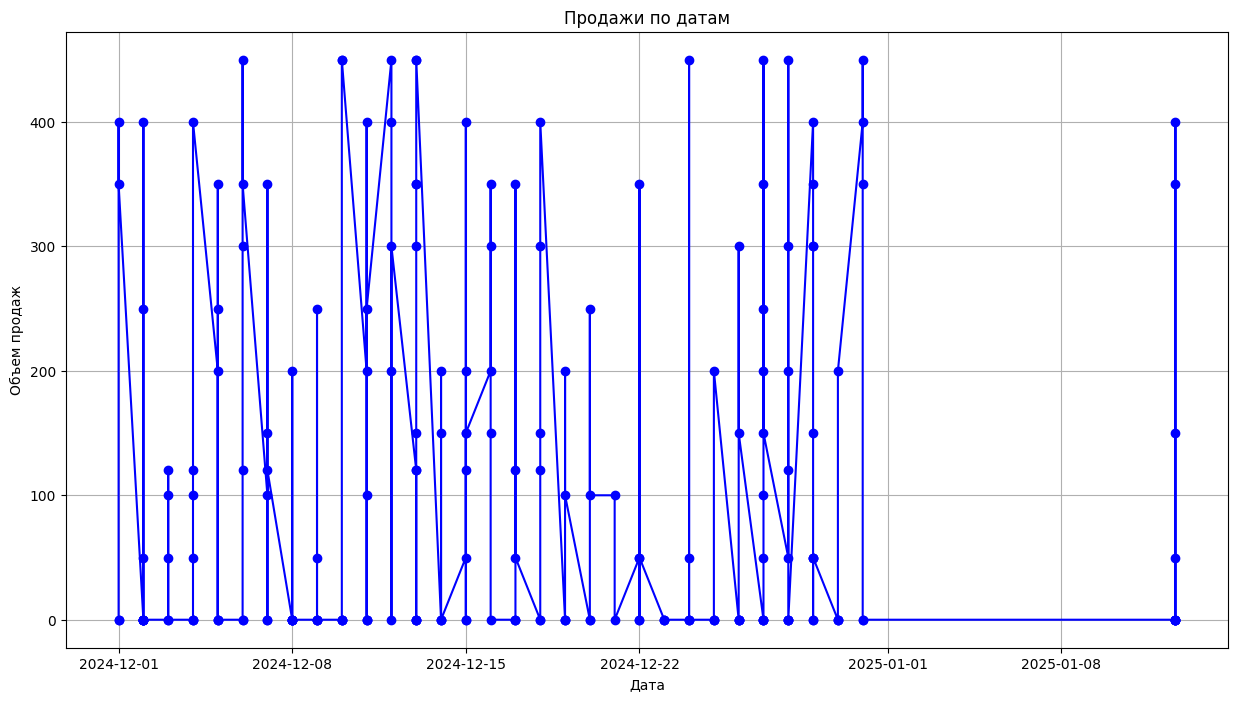

In [57]:
import matplotlib.pyplot as plt

df = pd.read_csv('sales_cleaning_large.csv', parse_dates=['date'])

print("Пропущенные значения:")
print(df.isnull().sum())

if df['date'].isna().any():
    df['date'] = df['date'].fillna(pd.to_datetime('today'))

negative_sales_index = df['sales'] < 0
if negative_sales_index.any():
    median_sales = df['sales'].median()
    df.loc[negative_sales_index, 'sales'] = median_sales

if df['sales'].isna().any():
    mean_sales = df['sales'].mean()
    df['sales'].fillna(mean_sales, inplace=True)

print("\nПропущенные значения после очистки:")
print(df.isnull().sum())

df.sort_values(by='date', inplace=True)

plt.figure(figsize=(15, 8))
plt.plot(df['date'], df['sales'], marker='o', linestyle='-', color='blue')
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Объем продаж')
plt.grid(True)
plt.show()

Задание 4: Получение данных из API

In [87]:
import pandas as pd
import requests

response = requests.get("https://jsonplaceholder.typicode.com/users")
data = response.json()

df = pd.DataFrame(data, columns=['id', 'name', 'email', 'company'])

df['company_name'] = df['company'].apply(lambda x: x['name'])

filtered_df = df[df['company_name'].str.contains("Group", case=False)]

print(filtered_df[['id', 'name', 'email', 'company_name']])

   id                      name                   email     company_name
6   7           Kurtis Weissnat  Telly.Hoeger@billy.biz      Johns Group
7   8  Nicholas Runolfsdottir V    Sherwood@rosamond.me  Abernathy Group
